In [20]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [21]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [22]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [23]:
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

In [24]:
def compareAlgorithmsForBarChart(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn.model_selection import StratifiedKFold
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [55]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        ax.legend(loc='upper right')
        #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

        
    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()

In [49]:
def barChart(results, score, string):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    
    labels = ['LR', 'SVM', 'Linear SVM', 'NB', 'MLP', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x , results, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    # annotate bars
    #ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    #ax.legend(loc='upper center')

    fig.tight_layout()

    # save plot
    fileName = string +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()


In [56]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


baseline_precision-recall.png


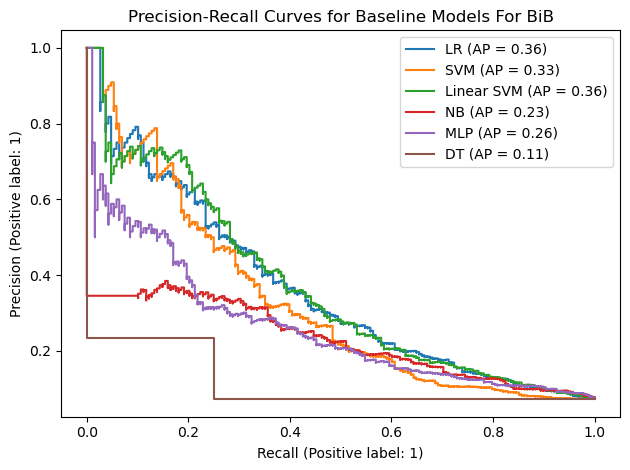

In [57]:
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, 
                          "Precision-Recall Curves for Baseline Models For BiB", "baseline_precision-recall")

In [29]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [30]:
precision_results, recall_results, auc_results, f05_results, names = compareAlgorithmsForBarChart(X_train,y_train)

[0.5648857092564186]
[0.08666666666666667]
[0.7858886914792127]
[0.2600065709792]
[0.5648857092564186, 0.7723076923076924]
[0.08666666666666667, 0.025333333333333336]
[0.7858886914792127, 0.6555920639513945]
[0.2600065709792, 0.10763405427553493]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667]
[0.08666666666666667, 0.025333333333333336, 0.02]
[0.7858886914792127, 0.6555920639513945, 0.7852717195999428]
[0.2600065709792, 0.10763405427553493, 0.08472898209032591]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667, 0.20758323485570437]
[0.08666666666666667, 0.025333333333333336, 0.02, 0.4173333333333334]
[0.7858886914792127, 0.6555920639513945, 0.7852717195999428, 0.7420805929044244]
[0.2600065709792, 0.10763405427553493, 0.08472898209032591, 0.2307180416478706]
[0.5648857092564186, 0.7723076923076924, 0.5666666666666667, 0.20758323485570437, 0.3618430394680395]
[0.08666666666666667, 0.025333333333333336, 0.02, 0.4173333333333334, 0.15333333333333335]
[0.785888691479

baseline_precision.png


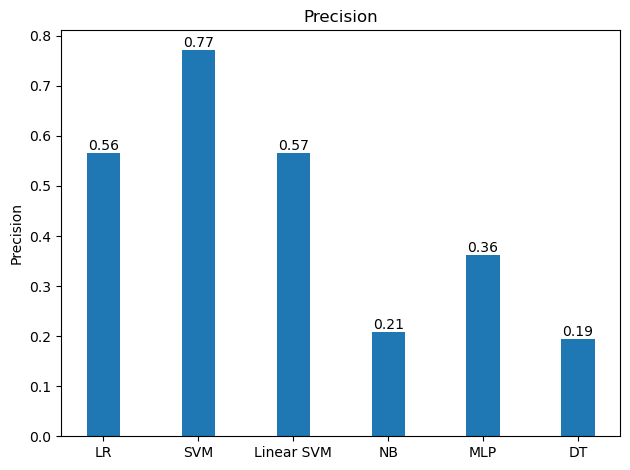

baseline_recall.png


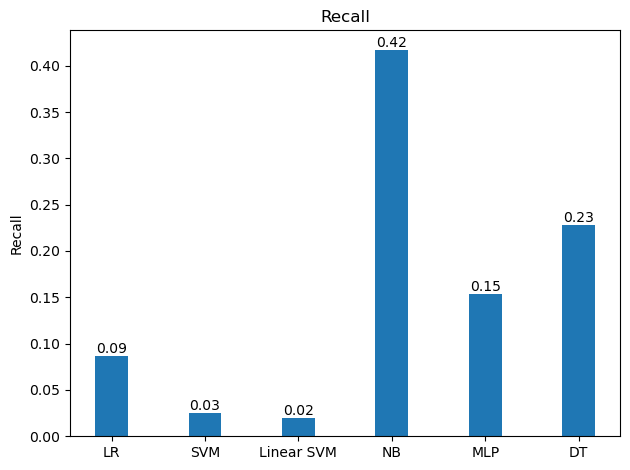

baseline_auc.png


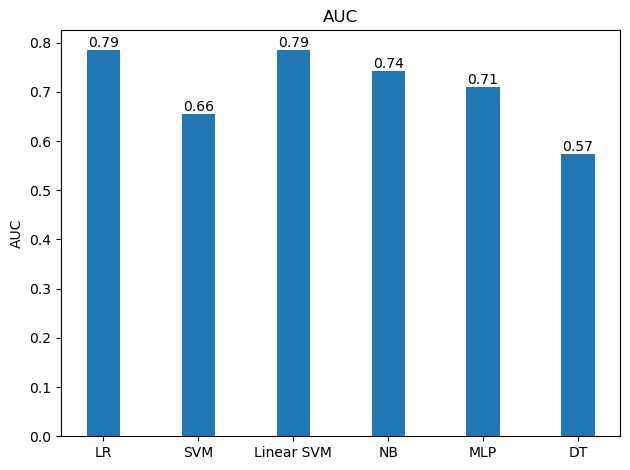

baseline_f05.png


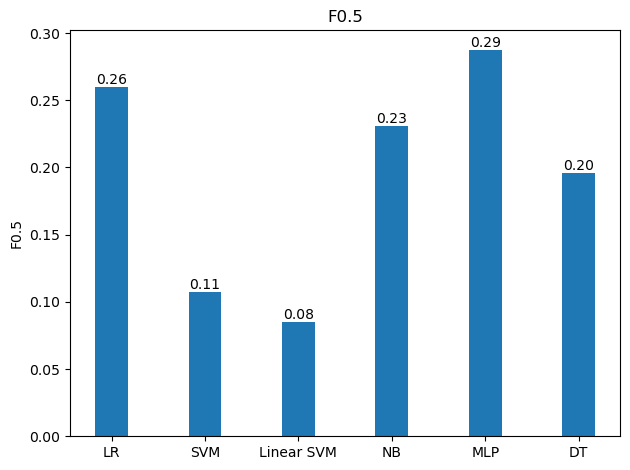

In [34]:
barChart(precision_results, "Precision", "baseline_precision")
barChart(recall_results, "Recall", "baseline_recall")
barChart(auc_results, "AUC", "baseline_auc")
barChart(f05_results, "F0.5", "baseline_f05")

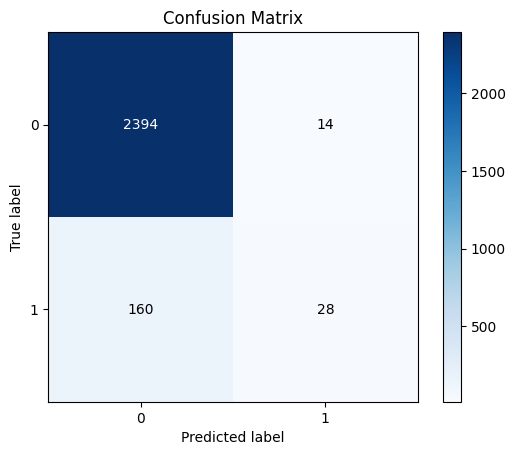

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2408
           1       0.67      0.15      0.24       188

    accuracy                           0.93      2596
   macro avg       0.80      0.57      0.60      2596
weighted avg       0.92      0.93      0.91      2596

Classification Accuracy: 0.933
Classification Error: 0.067
Sensitivity: 0.149
Specificity: 0.994
False Positive Rate: 0.006
Precision: 0.667
F1 Score: 0.243
AUC: 0.572


In [11]:

# baseline
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

# evaluate predictions
evaluate_model(y_test, y_pred)